<a href="https://colab.research.google.com/github/Alan-Cheong/IEEE_QW_2020/blob/master/Takashimaya_optimized_layout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

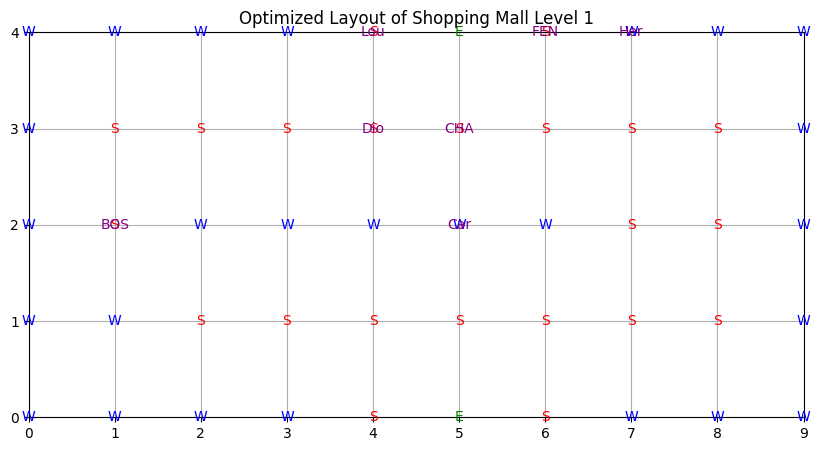

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Simplified representation of the mall layout
# We'll use a grid where each cell can represent a store or walkway
# 'E' for Entrance, 'S' for Store, 'W' for Walkway
layout = [
    ['W', 'W', 'W', 'W', 'W', 'E', 'W', 'W', 'W', 'W'],
    ['W', 'S', 'S', 'S', 'S', 'W', 'S', 'S', 'S', 'W'],
    ['W', 'S', 'W', 'W', 'S', 'W', 'W', 'S', 'S', 'W'],
    ['W', 'S', 'S', 'S', 'S', 'W', 'S', 'S', 'S', 'W'],
    ['W', 'W', 'W', 'W', 'W', 'E', 'W', 'W', 'W', 'W']
]

# List of stores with their current positions (x, y)
stores = {
    'Louis Vuitton': (1, 1),
    'BOSS': (1, 2),
    'CHANEL': (4, 1),
    'FENDI': (4, 2),
    'Dior': (4, 3),
    'Hermes': (7, 4),
    'Cartier': (5, 2),
    # Add other stores as needed
}

# Function to optimize store placement
def optimize_layout(layout, stores, entrances):
    # This is a very basic approach, in reality, this would involve complex algorithms
    # Here we're just moving high-profile stores near entrances

    # Identify high-traffic stores (example: luxury brands)
    high_traffic_stores = ['Louis Vuitton', 'CHANEL', 'FENDI', 'Dior', 'Hermes']

    # Place high-traffic stores near entrances
    for store in high_traffic_stores:
        x, y = stores[store]
        for entrance in entrances:
            ex, ey = entrance
            # Check if the store can be moved closer to an entrance
            if abs(x - ex) + abs(y - ey) > 1:  # If not adjacent to entrance
                # Find the closest empty spot
                for dx in [-1, 0, 1]:
                    for dy in [-1, 0, 1]:
                        nx, ny = ex + dx, ey + dy
                        if 0 <= nx < len(layout[0]) and 0 <= ny < len(layout):
                            if layout[ny][nx] == 'W':
                                layout[y][x] = 'W'  # Clear old position
                                layout[ny][nx] = 'S'  # Place store
                                stores[store] = (nx, ny)  # Update store position
                                break
                    else:
                        continue
                    break

    return layout, stores

# Entrances in the layout
entrances = [(5, 0), (5, 4)]  # Example entrance positions

# Optimize the layout
optimized_layout, optimized_stores = optimize_layout(layout, stores, entrances)

# Visualize the layout
def visualize_layout(layout, stores):
    fig, ax = plt.subplots(figsize=(10, 5))
    for y, row in enumerate(layout):
        for x, cell in enumerate(row):
            if cell == 'E':
                ax.text(x, y, 'E', va='center', ha='center', color='green')
            elif cell == 'S':
                ax.text(x, y, 'S', va='center', ha='center', color='red')
            else:
                ax.text(x, y, 'W', va='center', ha='center', color='blue')

    for store, (x, y) in optimized_stores.items():
        ax.text(x, y, store[:3], va='center', ha='center', color='purple')

    ax.set_xticks(np.arange(len(layout[0])))
    ax.set_yticks(np.arange(len(layout)))
    ax.grid(True)
    plt.title('Optimized Layout of Shopping Mall Level 1')
    plt.show()

# Visualize the optimized layout
visualize_layout(optimized_layout, optimized_stores)